# Chapter 2 - Machine Learning & its Algorithms

### Simple Linear Regression - Example 1

In [2]:
# Basic Libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

import pandas as pd
import numpy as np

In [3]:
# Defining a function for calculating values needed for Simple Linear Regression (SLR)

def coef_estimation(x, y):                           # Define function to estimate regression coefficients
    n = np.size(x)                                   # Get the size (number of elements) of x
    mean_x, mean_y = np.mean(x), np.mean(y)          # Calculate the mean of x and y
    cross_xy = np.sum(y * x) - n * mean_y * mean_x   # Calculate the cross deviation of x and y
    cross_xx = np.sum(x * x) - n * mean_x * mean_x   # Calculate the deviation of x
    reg_b_1 = cross_xy / cross_xx                    # Calculate regression coefficient b1 (slope)
    reg_b_0 = mean_y - reg_b_1 * mean_x              # Calculate regression coefficient b0 (intercept)
    return(reg_b_0, reg_b_1)                         # Return both regression coefficients

In [4]:
# Defining a function for plotting the regression line

def plot_regression_line(x, y, b):                   # Define function to plot regression line
    plt.scatter(x, y, color="r", marker="o", s=20)   # Create scatter plot of the data points with red color and circle markers
    y_pred = b[0] + b[1] * x                         # Calculate predicted y values using regression coefficients
    plt.plot(x, y_pred, color="g")                   # Plot the regression line in green
    plt.xlabel('x')                                  # Set the x-axis label
    plt.ylabel('y')                                  # Set the y-axis label
    plt.show()                                       # Display the plot

Estimated coefficients:
reg_b_0 = 187.08333333333337 
reg_b_1 = 118.03571428571429


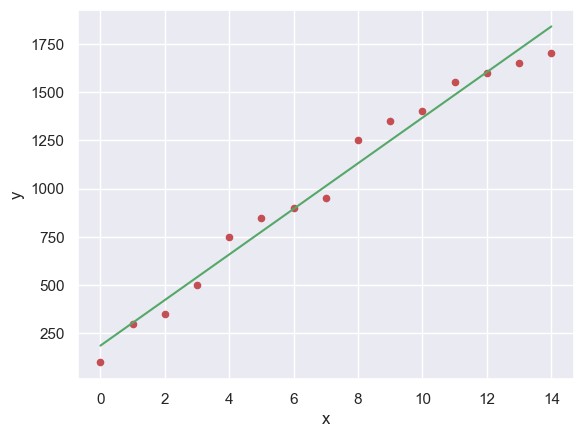

In [5]:
# Defining the main() function to provide dataset and calling above-defined functions

def main():                            # Define main function
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])                                  # Define array x with values from 0 to 14
    y = np.array([100, 300, 350, 500, 750, 850, 900, 950, 1250, 1350, 1400, 1550, 1600, 1650, 1700])  # Define array y with corresponding values

    b = coef_estimation(x, y)          # Estimate regression coefficients by calling coef_estimation
    print("Estimated coefficients:\nreg_b_0 = {} \nreg_b_1 = {}".format(b[0], b[1]))                  # Print the estimated coefficients
    plot_regression_line(x, y, b)      # Plot the regression line using the calculated coefficients
  
if __name__ == "__main__": 
        main()

### Simple Linear Regression - Example 2

In [7]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
#Loading the dataset and creating its object

diabetes_data = datasets.load_diabetes()

diabetes_data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [9]:
# Extract the third feature from diabetes_data and reshape it to add a new axis
X = diabetes_data.data[:, np.newaxis, 2] 

#X

In [10]:
type(X)                     # Returns the type of X (e.g., <class 'numpy.ndarray'>)

numpy.ndarray

In [11]:
# Splitting the data into training and testing sets

X_train = X[:-35]   # Assign all elements except the last 35 to the training set
X_test = X[-35:]    # Assign the last 35 elements to the testing set

In [12]:
# Splitting the target into training and testing sets

y_train = diabetes_data.target[:-35]   # Assign all elements except the last 35 to the training target set
y_test = diabetes_data.target[-35:]    # Assign the last 35 elements to the testing target set

In [13]:
#Creating linear regression object

SLR_reg = linear_model.LinearRegression() # Create an instance of the LinearRegression model from scikit-learn
SLR_reg.fit(X_train, y_train)             # Training the model using the training sets
y_pred = SLR_reg.predict(X_test)          # Making predictions by using the testing set

In [14]:
# Printing Regeression Coefficient, Mean Squared Error(MSE),Variance Score. Also plotting the regression line and labels on it.
   
print('Coefficients: \n', SLR_reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [963.82249207]
Mean squared error: 3487.66
Variance score: 0.26


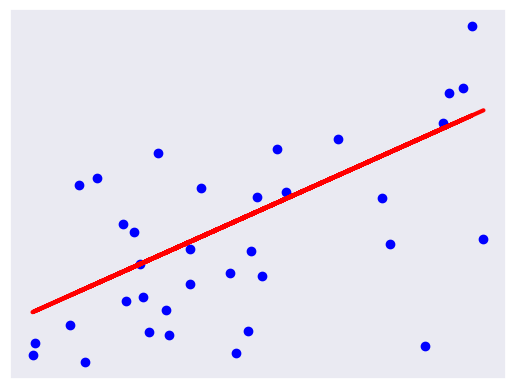

In [15]:
#Plotting the outputs:

plt.scatter(X_test, y_test, color='blue')           # Create a scatter plot of the test data points in blue
plt.plot(X_test, y_pred, color='red', linewidth=3)  # Plot the regression line using predicted values in red with a line width of 3

plt.xticks(())    # Remove x-axis tick labels for a cleaner plot
plt.yticks(())    # Remove y-axis tick labels for a cleaner plot
plt.show();       # Display the plot

### Multiple Linear Regression

In [17]:
from sklearn.datasets import fetch_california_housing

#Loading the dataset and creating its object

california_data = fetch_california_housing()         # Load California housing dataset

X, y = california_data.data, california_data.target  # Features and target

In [18]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
from sklearn.model_selection import train_test_split

#Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,               # Split the features into training and testing sets
                                                    y,               # Split the target into training and testing sets
                                                    test_size=0.6,   # Use 60% of the data for testing
                                                    random_state=1)  # Set random state for reproducibility

In [20]:
MLR_reg = linear_model.LinearRegression()  # Create an instance of the LinearRegression model for multiple linear regression
MLR_reg.fit(X_train, y_train)              # Fit the model to the training data (learn the relationships between features and target)

LinearRegression()

In [21]:
# Printing Regression Coefficient and Variance Score

print('Coefficients: \n', MLR_reg.coef_)                                 # Print the coefficients of the model
print('\nVariance score: {:.4f}'.format(MLR_reg.score(X_test, y_test)))  # Print the R^2 variance score for the test data

Coefficients: 
 [ 4.26150444e-01  9.21631738e-03 -7.73301921e-02  4.68047432e-01
 -9.56358090e-06 -2.46786608e-03 -4.26342116e-01 -4.38011960e-01]

Variance score: 0.6035


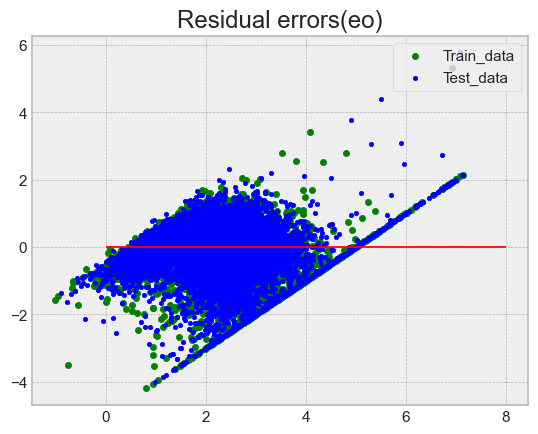

In [22]:
# Plotting the regression line with labels

plt.style.use('bmh')                             # Set plot style to 'bmh' for better visual appearance

plt.scatter(MLR_reg.predict(X_train),            # Plot predicted values vs. residual errors for the training set
            MLR_reg.predict(X_train) - y_train,  # Residuals (errors) for training data
            color="green",                       # Use green color for training data points
            s=20,                                # Set marker size to 20
            label='Train_data')                  # Add label for training data points

plt.scatter(MLR_reg.predict(X_test),             # Plot predicted values vs. residual errors for the test set
            MLR_reg.predict(X_test) - y_test,    # Residuals (errors) for testing data
            color="blue",                        # Use blue color for testing data points
            s=10,                                # Set marker size to 10
            label='Test_data')                   # Add label for testing data points

plt.hlines(y=0,             # Draw a horizontal line at y=0 to indicate no error
           xmin=0,          # Set the start of the horizontal line to x=0
           xmax=8,         # Set the end of the horizontal line to x=50
           color='red',     # Use red color for the horizontal line
           linewidth=1.25)  # Set line width to 1.25

plt.legend(loc='upper right')     # Add legend to the upper right corner of the plot
plt.title("Residual errors(eo)")  # Set the title of the plot to "Residual errors(eo)"
plt.show();                       # Display the plot

## Logistic Regression

In [24]:
from sklearn.datasets import load_digits

#Downloading the digit dataset

digits_dataset = load_digits()

In [25]:
# Printing total images and labels in the dataset 

print(digits_dataset.data.shape)
print(digits_dataset.target.shape)

(1797, 64)
(1797,)


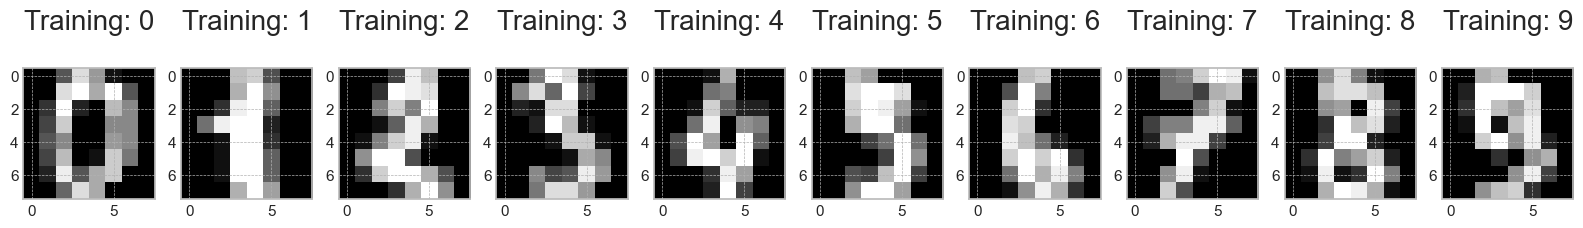

In [26]:
#Let’s have a look at the training data

plt.figure(figsize=(20, 4))                           # Create a figure with a specified size of 20x4 inches

for index, (image, label) in enumerate(zip(digits_dataset.data[0:10], digits_dataset.target[0:10])):  # Iterate over the first 10 images and 
                                                                                                      # labels in the dataset
    plt.subplot(1, 10, index + 1)                            # Create a subplot grid with 1 row and 10 columns, select current subplot
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)  # Reshape the image to an 8x8 matrix and display it in grayscale
    plt.title('Training: %i\n' % label, fontsize=20)         # Set the title of the subplot with the label value and set the font size to 20

In [27]:
from sklearn.model_selection import train_test_split

#Splitting the dataset into training and testing data set

x_train, x_test, y_train, y_test = train_test_split(digits_dataset.data,    # Split the feature data into training and testing sets
                                                    digits_dataset.target,  # Split the target labels into training and testing sets
                                                    test_size=0.30,         # Use 30% of the data for testing
                                                    random_state=0)         # Set random state for reproducibility of the split

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Create and fit the model
logRegression = LogisticRegression(max_iter=200)  # Create an instance of LogisticRegression, number of iterations (max_iter=200) to ensure convergence
logRegression.fit(x_train, y_train)        # Fit the logistic regression model to the scaled training data

LogisticRegression(max_iter=200)

In [29]:
# Predicting for images

logRegression.predict(x_test[0].reshape(1, -1)) # Predict the label for a single test image, reshaped to match the expected input format

logRegression.predict(x_test[0:10])             # Predict the labels for the first 10 images in the test set

y_pred = logRegression.predict(x_test)          # Predict the labels for all images in the test set and store in y_pred

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Calculating performance metrics (Confusion matrix, Classification Report and Accuracy) of our decision tree classifier. 

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('Accuracy:\n',accuracy_score(y_test,y_pred))

Confusion Matrix:
 [[45  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  2  1]
 [ 0  1 50  2  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  1  1]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 54  1  0  0  2]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  1  0  1  1  0  0 50  0  0]
 [ 0  3  1  1  0  0  0  0 53  3]
 [ 0  0  0  0  0  1  0  0  1 55]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.89      0.94      0.92        52
           2       0.98      0.94      0.96        53
           3       0.93      0.96      0.95        54
           4       0.98      0.98      0.98        48
           5       0.98      0.95      0.96        57
           6       0.98      0.98      0.98        60
           7       0.98      0.94      0.96        53
           8       0.93      0.87      0.90        61
           9       0.89      0.96      0.92        57

    accuracy                 

### Decision Tree Algorithm

In [32]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

In [33]:
#Download the Pima-Indiands-Diabetes dataset and read it using Pandas as follows:

Data_column_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

url = ("https://raw.githubusercontent.com/RohitBhalerao/Neural-Network-Diabetes-Prediction/refs/heads/master/pima-indians-diabetes.csv")

Dataset_pima_diabetes = pd.read_csv(url, header=None, names= Data_column_names)

Dataset_pima_diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
#Splitting the dataset in fetaures and target variables

feature_columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']

# Features
X = Dataset_pima_diabetes[feature_columns] 

# Target variable
y = Dataset_pima_diabetes.label 

#Splitting the dataset for training and testing purpose
X_train, X_test, y_train, y_test = train_test_split(X,              # Split the feature data into training and testing sets
                                                    y,              # Split the target labels into training and testing sets
                                                    test_size=0.2,  # Use 20% of the data for testing
                                                    random_state=1) # Set random state for reproducibility of the split 

In [35]:
# Create and fit the model
DT_classifier = DecisionTreeClassifier()             # Create an instance of the DecisionTreeClassifier
DT_classifier = DT_classifier.fit(X_train, y_train)  # Fit the decision tree classifier to the training data

y_pred = DT_classifier.predict(X_test)               # Make predictions from trained model

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Calculating performance metrics

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))              # Print the confusion matrix comparing actual vs predicted labels
print('\nClassification Report:\n', classification_report(y_test, y_pred))  # Print the classification report (precision, recall, F1-score)
print('Accuracy:\n', accuracy_score(y_test, y_pred))                        # Print the accuracy score of the model on the test data

Confusion Matrix:
 [[79 20]
 [25 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78        99
           1       0.60      0.55      0.57        55

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154

Accuracy:
 0.7077922077922078


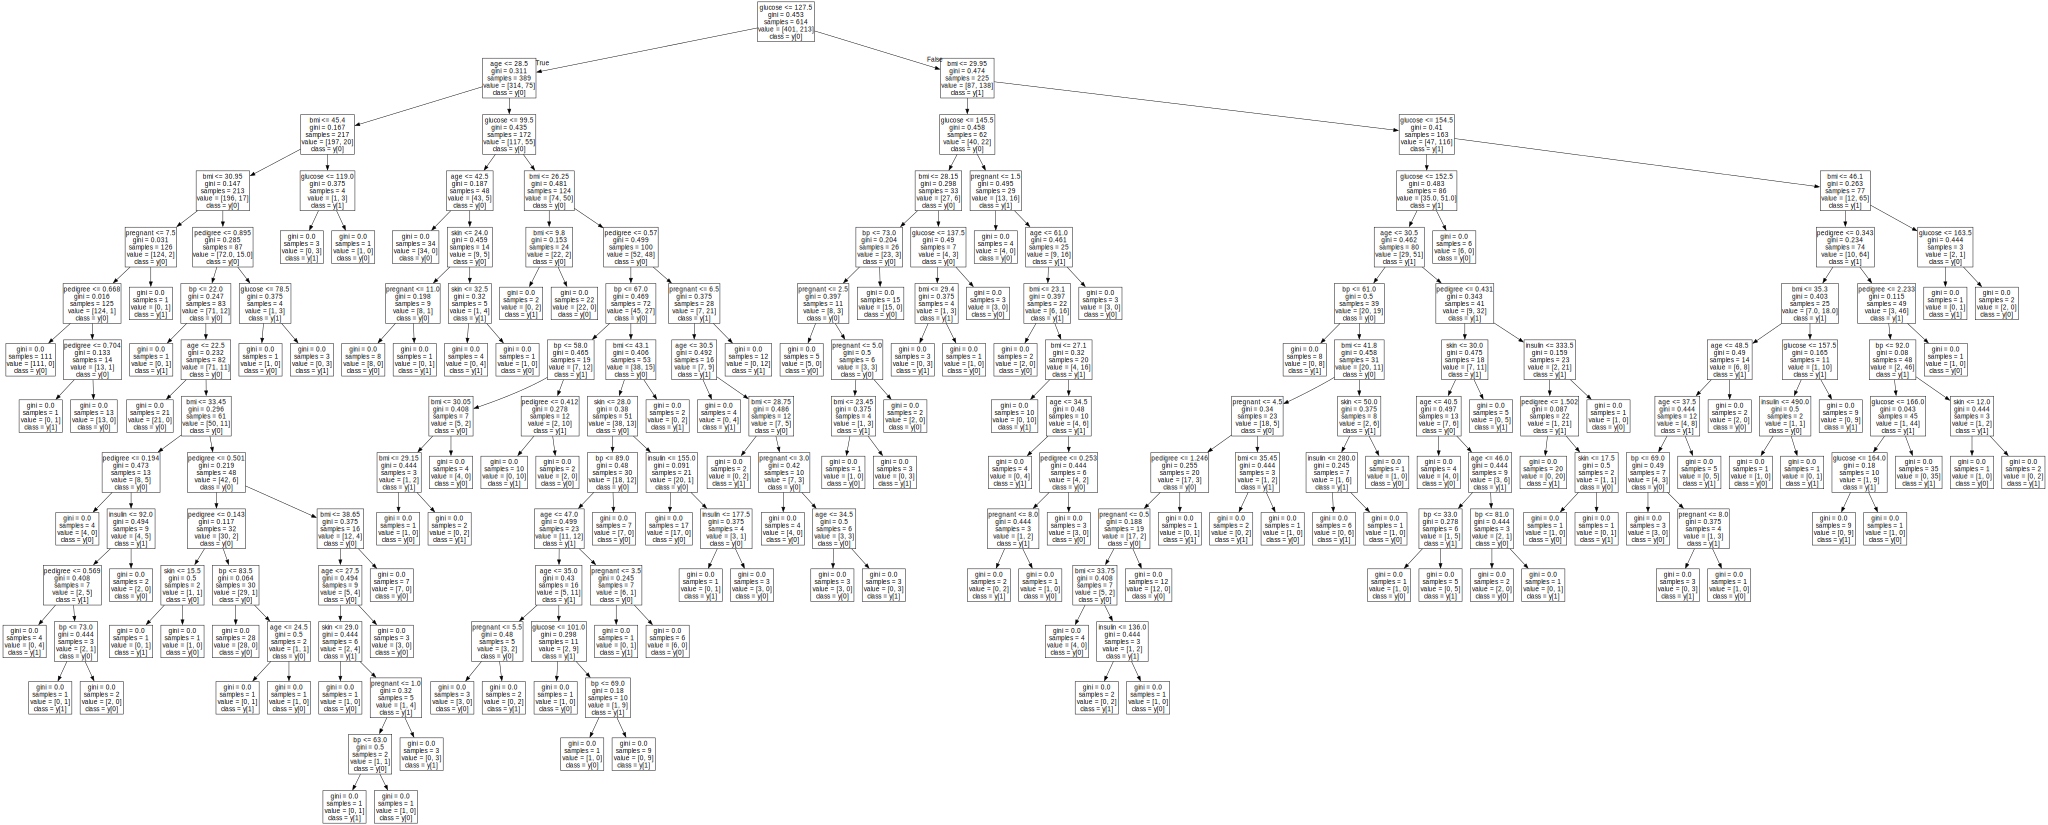

In [37]:
import graphviz
from sklearn import tree

#Visualizing our decision tree
dot_data = tree.export_graphviz(DT_classifier,      # Export the decision tree in DOT format for visualization
                                out_file=None,      # Do not output to a file directly
                                feature_names=feature_columns,  # Set feature names for better interpretability
                                class_names=True)   # Include class names in the visualization
graph = graphviz.Source(dot_data)                   # Create a graph from the DOT data using graphviz
graph                                               # Display the graph inline in Jupyter Notebook

#graph.render("DTVisualize", view=True)             # Render and save the decision tree as "DTVisualize" and open it for viewing

### Random Forest

In [39]:
# Create and fit the model
RF_classifier = DecisionTreeClassifier()           # Create an instance of the DecisionTreeClassifier
RF_classifier = RF_classifier.fit(X_train,y_train) # Fit the decision tree classifier to the training data

y_pred = RF_classifier.predict(X_test)  # Make predictions from trained model

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Calculating performance metrics

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))              # Print the confusion matrix comparing actual vs predicted labels
print('\nClassification Report:\n', classification_report(y_test, y_pred))  # Print the classification report (precision, recall, F1-score)
print('Accuracy:\n', accuracy_score(y_test, y_pred))                        # Print the accuracy score of the model on the test data

Confusion Matrix:
 [[79 20]
 [25 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78        99
           1       0.60      0.55      0.57        55

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154

Accuracy:
 0.7077922077922078


### Naive Bayes

In [42]:
from sklearn import preprocessing 
from sklearn.naive_bayes import GaussianNB

In [43]:
#Assigning features and label variables to the columns of our dataset:

weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Overcast','Rainy']
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Mild','Cool','Mild','Mild','Mild']
play = ['N','N','Y','Y','N','N','Y','Y','Y','Y','Y']

#Creating Label Encoder
Lbl_encoder = preprocessing.LabelEncoder()

# Convert string labels into numbers
encode_weatherdata = Lbl_encoder.fit_transform(weather)  # Fit the label encoder to the 'weather' data and transform it into numerical values
encode_temperaturedata = Lbl_encoder.fit_transform(temp) # Fit the label encoder to the 'temperature' data and transform it into numerical values
encode_labeldata = Lbl_encoder.fit_transform(play)       # Fit the label encoder to the 'play' data and transform it into numerical values

# Printing encoded data
print ("Encoded Weather Data is:", encode_weatherdata)
print ("Encoded Temperature Data is:", encode_temperaturedata)
print ("Encoded Label Data is:", encode_labeldata)

Encoded Weather Data is: [2 2 0 1 1 0 2 2 1 0 1]
Encoded Temperature Data is: [1 1 1 2 0 0 2 0 2 2 2]
Encoded Label Data is: [0 0 1 1 0 0 1 1 1 1 1]


In [44]:
# Combining both the features in a single list of tuples
combn_features=tuple(zip(encode_weatherdata, encode_temperaturedata))
print ("Combined features in a single list of tuples:", combn_features)

#Generating a Gaussian Classifier
NB_model = GaussianNB()

# Training our model
NB_model.fit(combn_features, encode_labeldata)

Combined features in a single list of tuples: ((2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (0, 2), (1, 2))


GaussianNB()

In [45]:
# Predicting the Output

predicted = NB_model.predict([[1, 0]])  # Use the Naive Bayes model to predict the output for input features [1, 0] (1: Rainy, 0: Cool)
print("Predicted Value:", predicted)    # Print the predicted value for the given input [1, 0] (1: Yes, 0: No)

Predicted Value: [0]


So, if is Rainy and Cool, there will be no play today.

#### Multi Class Classification uisng Naive Bayes Algorithm

In [48]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 

In [49]:
#Loading iris-flower dataset
iris_flower = datasets.load_iris()

# Printing the names of the features
print ("Features: ", iris_flower.feature_names)

# Printing the label type of flowers
print ("Labels: ", iris_flower.target_names)

# Printing data shape
iris_flower.data.shape

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


(150, 4)

In [50]:
# Printing the iris-flower data features (top 10 records)
print (iris_flower.data[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [51]:
# Printing the iris-flower labels (0:setosa, 1:versicolor, 2:virginica)
print (iris_flower.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [52]:
# Splitting iris-dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris_flower.data,    # Split the feature data into training and testing sets
                                                    iris_flower.target,  # Split the target labels into training and testing sets
                                                    test_size=0.3,       # Use 30% of the data for testing
                                                    random_state=115)    # Set random state to ensure reproducibility of the split

Alternative way:

```Python
# Loading the iris-flower dataset
iris_flower = datasets.load_iris()

# Converting it to a DataFrame
iris_df = pd.DataFrame(data=iris_flower.data, columns=iris_flower.feature_names)

# Adding the target column (flower species)
iris_df['target'] = iris_flower.target

# Display the first five rows of the DataFrame
iris_df.head()

# Extract features (all columns except 'target') and target (the 'target' column) from the DataFrame
X = iris_df.drop(columns=['target'])  # Features: drop the 'target' column to use the remaining columns as features
y = iris_df['target']                 # Target: extract the 'target' column as the target variable

# Split the features and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,  # Split the feature data into training and testing sets
                                                    y,  # Split the target labels into training and testing sets
                                                    test_size=0.3,       # Use 30% of the data for testing
                                                    random_state=115)    # Set random state to ensure reproducibility of the split
```

In [54]:
#Generating a Gaussian Classifier
NB_iris = GaussianNB()

#Training the classifier model using the training sets
NB_iris.fit(X_train, y_train)

#Predicting the response for testing dataset
y_pred = NB_iris.predict(X_test)

#Importing the scikit-learn metrics module for calculating the accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


### Support Vector Machine (SVM)

In [56]:
from scipy import stats

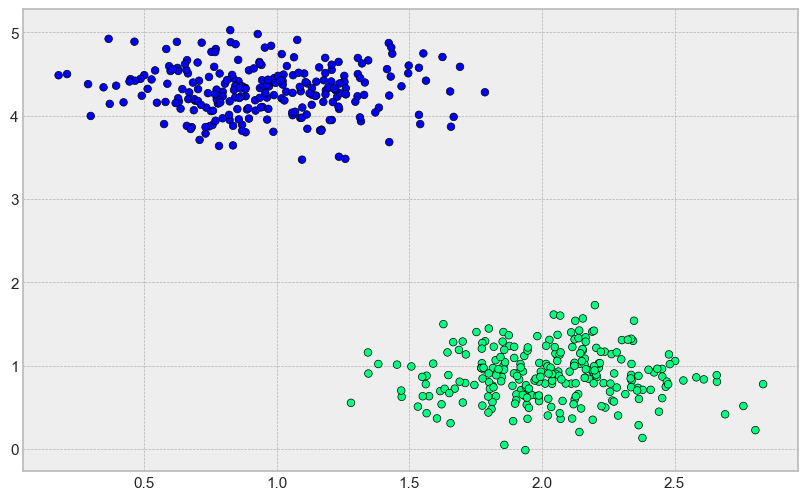

In [57]:
from sklearn.datasets import make_blobs

# Create a synthetic dataset using make_blobs
X_data, y_data = make_blobs(n_samples=500,    # Generate 500 samples (data points)
                            centers=2,        # Generate 2 cluster centers (classes)
                            random_state=0,   # Set random state for reproducibility
                            cluster_std=0.30) # Set standard deviation of clusters to control spread

# Set the figure size before plotting
plt.figure(figsize=(10, 6))    # Set figure size

# Scatter plot of the generated dataset
plt.scatter(X_data[:, 0],      # Plot the x-coordinates (first feature)
            X_data[:, 1],      # Plot the y-coordinates (second feature)
            c=y_data,          # Color points based on their cluster label
            s=30,              # Set marker size to 30
            cmap='winter',     # Set colormap to 'winter' for coloring the clusters
            edgecolor='black') # Border color for the data point markers

plt.show();  # Display the plot

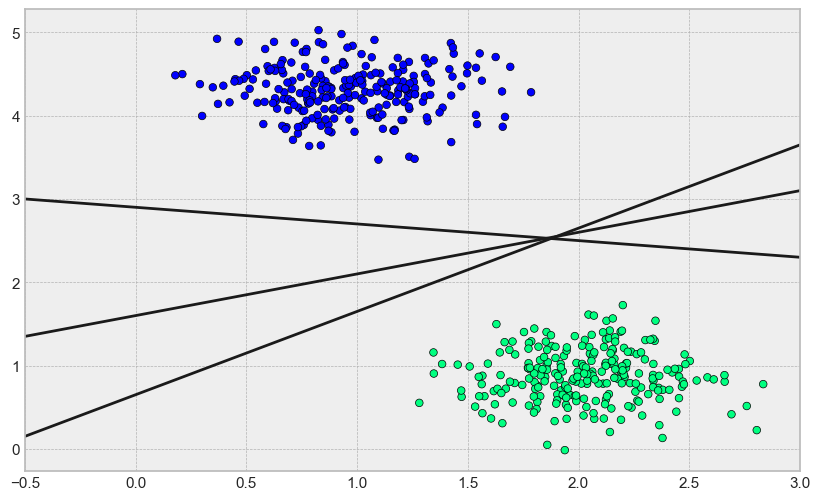

In [58]:
# Implementing discriminative classification

xfit = np.linspace(-0.5, 3)    # Generate 50 evenly spaced values from -1 to 3.5 for fitting lines

# Set the figure size before plotting
plt.figure(figsize=(10, 6))    # Set figure size

# Scatter plot of the generated dataset
plt.scatter(X_data[:, 0],      # Plot the x-coordinates (first feature)
            X_data[:, 1],      # Plot the y-coordinates (second feature)
            c=y_data,          # Color points based on their cluster label
            s=30,              # Set marker size to 30
            cmap='winter',     # Set colormap to 'winter' for coloring the clusters
            edgecolor='black') # Border color for the data point markers

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:  # Loop over different slopes (m) and intercepts (b) for lines
    plt.plot(xfit, m * xfit + b, '-k')             # Plot each line with slope `m` and intercept `b` in black ('-k')

plt.xlim(-0.5, 3)  # Set x-axis limits from -1 to 3.5
plt.show();        # Display the plot

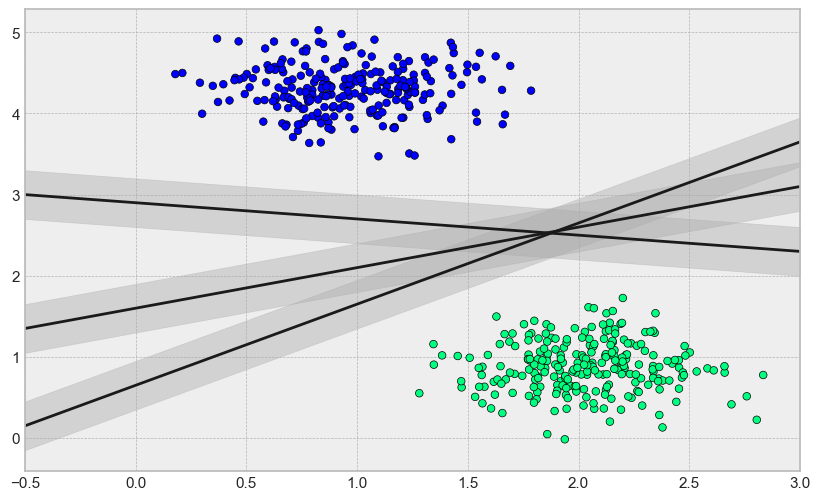

In [59]:
# In order to find MMH, drawing a margin of some width, up to the nearest point, around each line

xfit = np.linspace(-0.5, 3)    # Generate 50 evenly spaced values from -1 to 3.5 for fitting lines

# Set the figure size before plotting
plt.figure(figsize=(10, 6))    # Set figure size

# Scatter plot of the generated dataset
plt.scatter(X_data[:, 0],      # Plot the x-coordinates (first feature)
            X_data[:, 1],      # Plot the y-coordinates (second feature)
            c=y_data,          # Color points based on their cluster label
            s=30,              # Set marker size to 30
            cmap='winter',     # Set colormap to 'winter' for coloring the clusters
            edgecolor='black') # Border color for the data point markers

# Create Lines to separate the two groups
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: # Loop over different slopes (m) and intercepts (b) for lines
    plt.plot(xfit, m * xfit + b, '-k')            # Plot each line with slope `m` and intercept `b` in black ('-k')

    # Fill the area around each line to indicate the uncertainty or decision boundary
    yfit = m * xfit + b                 # Calculate the y-values for the current line
    d = 0.3                             # Define a margin distance for the shaded area around the line
    plt.fill_between(xfit,              # Fill the area between yfit - d and yfit + d
                     yfit - d,          # Lower boundary of the shaded area
                     yfit + d,          # Upper boundary of the shaded area
                     edgecolor='none',  # No border color for the shaded area
                     color='#AAAAAA',   # Set the color of the shaded area (light gray)
                     alpha=0.4)         # Set transparency of the shaded area (alpha = 0.4)
    
plt.xlim(-0.5, 3)  # Set x-axis limits from -1 to 3.5
plt.show();        # Display the plot

In [60]:
from sklearn.svm import SVC 

# Support vector classifier
model = SVC(kernel='linear')  # Create an instance of the Support Vector Classifier (SVC) with a linear kernel
model.fit(X_data, y_data)     # Fit the SVC model to the training data (X_data as features, y_data as labels)

SVC(kernel='linear')

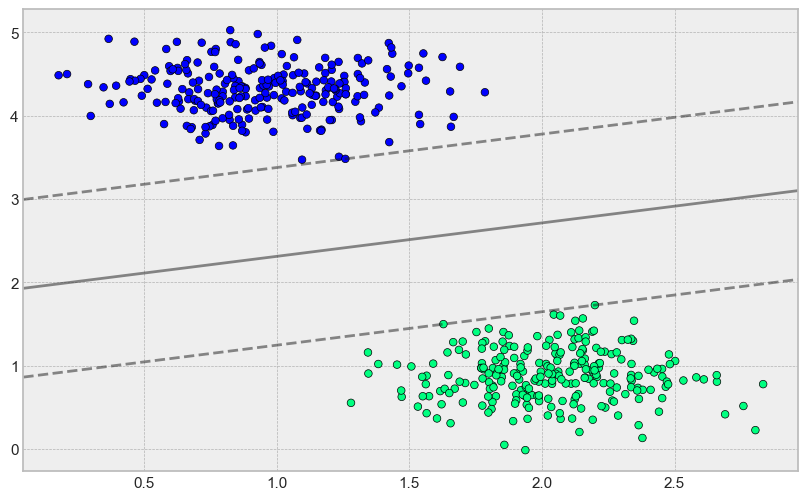

In [61]:
# Plotting the decision function for 2-dimensional SVC

def decision_function(model, ax=None, plot_support=True): # Define function to plot decision boundaries of the SVC model
    if ax is None:                                        # If no axis is provided
        ax = plt.gca()                                    # Get the current axis of the plot

    xlim = ax.get_xlim()                                  # Get x-axis limits of the current plot
    ylim = ax.get_ylim()                                  # Get y-axis limits of the current plot

    x = np.linspace(xlim[0], xlim[1], 30)                 # Create 30 evenly spaced values between x-axis limits
    y = np.linspace(ylim[0], ylim[1], 30)                 # Create 30 evenly spaced values between y-axis limits
    Y, X = np.meshgrid(y, x)                              # Create a grid of x and y coordinates for contour plotting

    xy = np.vstack([X.ravel(), Y.ravel()]).T              # Flatten the X and Y arrays and stack them as pairs (x, y)
    P = model.decision_function(xy).reshape(X.shape)      # Get the decision function values for the entire grid, and reshape to match grid shape

    ax.contour(X, Y, P, colors='k',                       # Plot the decision contours based on decision function values
               levels=[-1, 0, 1], alpha=0.5,              # Contour levels for margin lines (-1, 0, 1) with transparency
               linestyles=['--', '-', '--'])              # Different line styles: dashed for margin, solid for decision boundary

    if plot_support:                                      # If plot_support is True, plot the support vectors
        ax.scatter(model.support_vectors_[:, 0],          # Plot the x-coordinates of the support vectors
                   model.support_vectors_[:, 1],          # Plot the y-coordinates of the support vectors
                   s=400, linewidth=2, facecolors='none') # Set size, linewidth, and facecolor (none for transparent) of the markers

    ax.set_xlim(xlim)                                     # Reset x-axis limits to original
    ax.set_ylim(ylim)                                     # Reset y-axis limits to original

# Set the figure size before plotting
plt.figure(figsize=(10, 6))    # Set figure size

# Scatter plot of the generated dataset
plt.scatter(X_data[:, 0],      # Plot the x-coordinates (first feature)
            X_data[:, 1],      # Plot the y-coordinates (second feature)
            c=y_data,          # Color points based on their cluster label
            s=30,              # Set marker size to 30
            cmap='winter',     # Set colormap to 'winter' for coloring the clusters
            edgecolor='black') # Border color for the data point markers

# Plot the decision function (decision boundaries and support vectors) for the trained SVC model
decision_function(model);                                  

In [62]:
# Getting the support vectors points
model.support_vectors_

array([[1.2591839 , 3.48188418],
       [1.62869156, 1.49705048],
       [2.19960206, 1.72547019]])

### Kernel SVM

In [64]:
from sklearn import datasets
from sklearn.model_selection import train_test_split 

In [65]:
#Loading iris-flower dataset
iris_flower = datasets.load_iris()

# Printing the names of the features
print ("Features: ", iris_flower.feature_names)

# Printing the label type of flowers
print ("Labels: ", iris_flower.target_names,"\n")

# Printing data shape
print("Shape:",iris_flower.data.shape,"\n")

# Printing the iris-flower data features (top 10 records)
print ("First 10 records:\n",iris_flower.data[0:10],"\n")

# Printing the iris-flower labels (0:setosa, 1:versicolor, 2:virginica)
print ("All labels:\n",iris_flower.target)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica'] 

Shape: (150, 4) 

First 10 records:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] 

All labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [66]:
# Splitting iris-dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris_flower.data,   # Split the feature data into training and testing sets
                                                    iris_flower.target, # Split the target labels into training and testing sets
                                                    test_size=0.3,      # Use 30% of the data for the test set
                                                    random_state=115)   # Set random state to ensure reproducibility of the split

In [67]:
from sklearn.svm import SVC

# Training the algorithm by using SVC class fit method. Here we are using Polynomial kernel.

svm_K_classifier = SVC(kernel='poly', # Create an instance of the Support Vector Classifier (SVC) with a polynomial kernel
                       degree=8)      # Set the degree of the polynomial kernel to 8 (controls the complexity of the decision boundary)

svm_K_classifier.fit(X_train,  # Fit the SVM model to the training feature data
                     y_train)  # Fit the SVM model to the training target data

# Predicting the response for testing dataset
y_pred = svm_K_classifier.predict(X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the confusion matrix comparing actual vs predicted labels
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

print()

# Print the classification report showing precision, recall, f1-score, and support for each class
print('Classification Report:\n', classification_report(y_test, y_pred))  

Confusion Matrix:
 [[18  0  0]
 [ 0 10  0]
 [ 0  3 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.77      1.00      0.87        10
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



In [69]:
# Training the algorithm by using SVC class fit method. Here we are using rbf kernel.

svm_K_classifier = SVC(kernel='rbf')    # Create an instance of the Support Vector Classifier (SVC) with a Radial Basis Function (RBF) kernel
svm_K_classifier.fit(X_train, y_train)  # Fit the SVM model to the training feature data and labels

# Predicting the response for testing dataset
y_pred = svm_K_classifier.predict(X_test)

# Print the confusion matrix comparing actual vs predicted labels
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

print()

# Print the classification report showing precision, recall, f1-score, and support for each class
print('Classification Report:\n', classification_report(y_test, y_pred))  

Confusion Matrix:
 [[18  0  0]
 [ 0 10  0]
 [ 0  4 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.71      1.00      0.83        10
           2       1.00      0.76      0.87        17

    accuracy                           0.91        45
   macro avg       0.90      0.92      0.90        45
weighted avg       0.94      0.91      0.91        45



In [70]:
# Training the algorithm by using SVC class fit method. Here we are using sigmoid kernel.

svm_K_classifier = SVC(kernel='sigmoid')   # Create an instance of the Support Vector Classifier (SVC) with a sigmoid kernel
svm_K_classifier.fit(X_train, y_train)     # Fit the SVM model to the training feature data and labels

# Predicting the response for the testing dataset
y_pred = svm_K_classifier.predict(X_test)  # Predict the class labels for the test data

# Print the confusion matrix comparing actual vs predicted labels
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))  # Print confusion matrix for evaluation

print()

# Print the classification report showing precision, recall, f1-score, and support for each class
print('Classification Report:\n', classification_report(y_test, y_pred, zero_division=1))  # Print detailed classification reportt,y_pred))

Confusion Matrix:
 [[ 0 18  0]
 [ 0 10  0]
 [ 0 17  0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        18
           1       0.22      1.00      0.36        10
           2       1.00      0.00      0.00        17

    accuracy                           0.22        45
   macro avg       0.74      0.33      0.12        45
weighted avg       0.83      0.22      0.08        45



#### Kernel Summary:

| **Kernel Type** | **When to Use** | **Pros** | **Cons** |
|-----------------|-----------------|----------|----------|
| **Polynomial**  | When there are polynomial relationships or moderate feature interactions. | Good for interpreting feature interactions, controllable complexity. | May overfit with high degrees, computationally expensive for complex polynomials. |
| **RBF**         | When relationships are unknown or highly complex. Effective for high-dimensional data. | Highly flexible, versatile, suitable for complex decision boundaries. | Requires careful parameter tuning (C and gamma), computationally expensive for large datasets. |
| **Sigmoid**     | When approximating a neural network or for experimental use. | Simple decision boundaries, inspired by neural network activation functions. | Less effective on complex data, rarely used in practice, may converge poorly. |


### K-Nearest Neighbor (KNN) Classifier

In [74]:
#Downloading the Iris-flower dataset
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Assigning column names to the dataset
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Reading dataset to Pandas dataframes
iris_data = pd.read_csv(path, names= column_names)

# Display first rows
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
# Data preprocessing
X = iris_data.iloc[:, :-1].values # Extract all rows and all columns except the last one as features, convert to NumPy array
y = iris_data.iloc[:, 4].values   # Extract all rows from the fifth column (index 4) as target labels, convert to NumPy array

In [76]:
from sklearn.model_selection import train_test_split  

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,  # Split the features into training and testing sets
                                                    y,  # Split the target labels into training and testing sets
                                                    test_size=0.25,   # Use 25% of the data for the test set
                                                    random_state=42)  # Set random state for reproducibility of the split

In [77]:
from sklearn.preprocessing import StandardScaler 

# Data scaling for sending scaled data to the train the model
 
scaler = StandardScaler()            # Create an instance of StandardScaler to standardize features
scaler.fit(X_train)                  # Fit the scaler to the training data to calculate mean and standard deviation for scaling
X_train = scaler.transform(X_train)  # Transform the training data using the calculated mean and standard deviation
X_test = scaler.transform(X_test)    # Transform the test data using the same scaling parameters as the training data

In [78]:
from sklearn.neighbors import KNeighborsClassifier

# Training the algorithm by using KNeighborsClassifier class fit method. 
  
Knn_classifier = KNeighborsClassifier(n_neighbors=8)  # Create an instance of the K-Nearest Neighbors (KNN) classifier with 8 neighbors
Knn_classifier.fit(X_train, y_train)                  # Fit the KNN model to the training data to learn the patterns and neighbors

KNeighborsClassifier(n_neighbors=8)

In [79]:
#Predicting the response for testing dataset
y_pred = Knn_classifier.predict(X_test)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the confusion matrix comparing actual vs predicted labels
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

print()

# Print the classification report showing precision, recall, f1-score, and support for each class
print('Classification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [81]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation to evaluate the KNN classifier
scores = cross_val_score(Knn_classifier, X, y, cv=5)  # Split the data into 5 folds and calculate accuracy scores for each fold

print("Cross-Validation Scores:", scores)  # Print the individual accuracy scores for each of the 5 folds
print("Mean Accuracy:", scores.mean())     # Calculate and print the mean accuracy across all folds

Cross-Validation Scores: [0.96666667 1.         0.93333333 0.93333333 1.        ]
Mean Accuracy: 0.9666666666666668


    For each fold:
    Fold 1: The accuracy was 96.67% (0.96666667).
    Fold 2: The accuracy was 100% (1.0).
    Fold 3: The accuracy was 93.33% (0.93333333).
    Fold 4: The accuracy was 93.33% (0.93333333).
    Fold 5: The accuracy was 100% (1.0).

    Mean Accuracy: approximately 96.67%

### K-Nearest Neighbor (KNN) Regressor

In [84]:
#Downloading the Iris-flower dataset
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Assigning column names to the dataset
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Reading dataset to Pandas dataframes
iris_data = pd.read_csv(path, names= column_names)

# Data preprocessing
X = iris_data.iloc[:, :-1].values # Extract all rows and all columns except the last one as features, convert to NumPy array
y = iris_data.iloc[:, 4].values   # Extract all rows from the fifth column (index 4) as target labels, convert to NumPy array

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

# Convert target labels (y) to numeric values using LabelEncoder
label_encoder = LabelEncoder()                # Create an instance of LabelEncoder
y_numeric = label_encoder.fit_transform(y)    # Fit the label encoder to the target labels and transform them to numeric values

# Splitting the dataset (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.25, random_state=42)  # Split data into training and testing sets

# Training the KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Create an instance of the KNeighborsRegressor with 5 neighbors
knn_regressor.fit(X_train, y_train)                 # Fit the model to the training data

# Calculating and printing the Mean Squared Error (MSE)
y_pred = knn_regressor.predict(X)                   # Predict the target values for all data points in X
mse = np.mean(np.square(y_numeric - y_pred))        # Calculate the Mean Squared Error (MSE) between true and predicted values
print("The MSE is:", format(mse))                   # Print the MSE

The MSE is: 0.02293333333333333


### K-Means Clustering

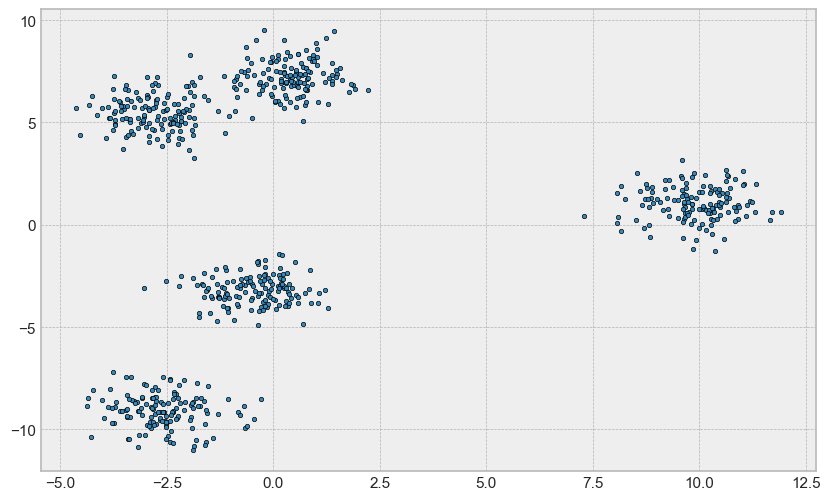

In [87]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 

# Generating 2-dimensional dataset having 5 blobs
X, y_true = make_blobs(n_samples=700,    # Generate 700 samples (data points)
                       centers=5,        # Generate 5 cluster centers (blobs)
                       cluster_std=0.8)  # Set standard deviation of clusters

# Set the figure size before plotting
plt.figure(figsize=(10, 6))    # Set figure size

# Scatter plot of the generated dataset
plt.scatter(X[:, 0],           # Plot the x-coordinates of the points
            X[:, 1],           # Plot the y-coordinates of the points
            s=10,              # Set marker size to 10
            edgecolor='black') # Set edge color of markers to black

plt.show()  # Display the plot

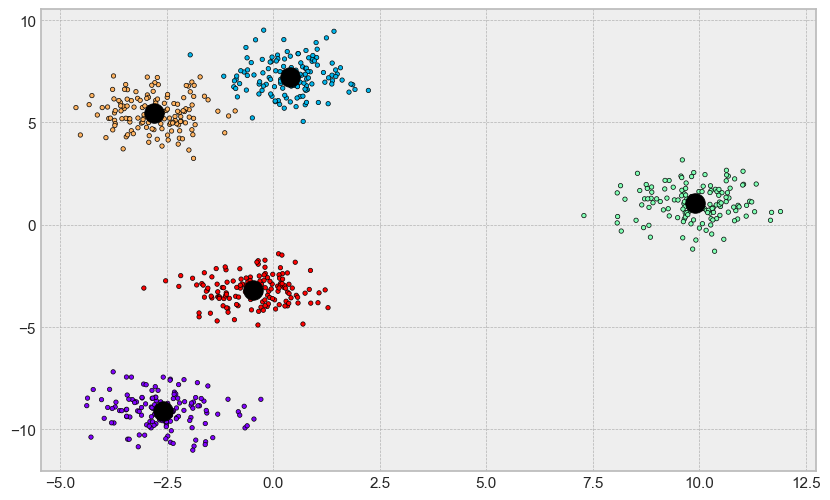

In [88]:
#Creating an object of k-means and providing number of clusters
kmeans = KMeans(n_clusters=5)

#Train the model by using fit method of k-means() class
kmeans.fit(X)

# do the predictions
y_kmeans = kmeans.predict(X)

# Set the figure size before plotting
plt.figure(figsize=(10, 6))

# Scatter plot of the clustered dataset
plt.scatter(X[:, 0],               # Plot the x-coordinates of the data points
            X[:, 1],               # Plot the y-coordinates of the data points
            c=y_kmeans,            # Color the points based on their cluster label
            s=10,                  # Set marker size to 10
            cmap='rainbow',        # Set the colormap to 'rainbow' for different colors per cluster
            edgecolor='black')     # Set edge color of markers to black for better visibility

# Plotting the cluster centers
centers = kmeans.cluster_centers_  # Get the coordinates of the cluster centers

plt.scatter(centers[:, 0],         # Plot the x-coordinates of the cluster centers
            centers[:, 1],         # Plot the y-coordinates of the cluster centers
            c='black',             # Set the color of cluster centers to black
            marker='o',            # Use a different marker ('X') for better visibility of centers
            s=200)                 # Set the marker size larger for cluster centers

plt.show();   # Display the plot

#### Differences Summary:

| **Aspect**               | **KNN Classifier**                                           | **KNN Regressor**                                       | **KNN Clustering**                                      |
|--------------------------|--------------------------------------------------------------|---------------------------------------------------------|---------------------------------------------------------|
| **Goal**                 | Classify a data point into one of the predefined classes.    | Predict a continuous value for a data point.            | Group data points into clusters based on similarity.    |
| **Output**               | Class label (e.g., A, B, C).                                 | Continuous value (e.g., price, temperature).            | Cluster label (e.g., Cluster 1, Cluster 2).            |
| **Decision Making**      | Uses majority vote among `k` neighbors.                      | Uses the average (or weighted average) of `k` neighbors.| Uses distance to group points into `k` clusters.        |
| **Application**          | Classification problems, such as image or text classification.| Regression problems, such as price prediction.         | Unsupervised learning problems like customer segmentation. |
| **How Predictions are Made** | Assigns the label that is most frequent among the `k` neighbors. | Calculates the average of the target values of the `k` neighbors. | Assigns each data point to the nearest cluster center.  |
